# COMP 551 - Project 2

## Import libraries

In [7]:
%pip install torch torchvision

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/16/dd/1bf10180ba812afa1aa7427466083d731bc37b9a1157ec929d0cfeef87eb/torch-2.1.0-cp311-none-macosx_10_9_x86_64.whl.metadata
  Using cached torch-2.1.0-cp311-none-macosx_10_9_x86_64.whl.metadata (24 kB)
  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/23/84/46481327771d4f63feb59dd0d9e1cd6a42e985dbd371965f486a5bf9f323/torchvision-0.16.0-cp311-cp311-macosx_10_13_x86_64.whl.metadata
  Using cached torchvision-0.16.0-cp311-cp311-macosx_10_13_x86_64.whl.metadata (6.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.7/146.7 MB 412.6 kB/s eta 0:00:0000:0100:08
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 263.5 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from sklearn.preprocessing import StandardScaler

# Task 1: Acquire, preprocess, and analyze the data

### Load Fashion MNIST and CIFAR-10 datasets

In [9]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

fashion_mnist_train = datasets.FashionMNIST('data', train=True, download=True, transform=transform)
fashion_mnist_test = datasets.FashionMNIST('data', train=False, download=True, transform=transform)

cifar10_train = datasets.CIFAR10('data', train=True, download=True, transform=transform)
cifar10_test = datasets.CIFAR10('data', train=False, download=True, transform=transform)

100%|███████████████████████████| 26421880/26421880 [00:58<00:00, 450659.68it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|█████████████████████████████████| 29515/29515 [00:00<00:00, 233896.97it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|█████████████████████████████| 4422102/4422102 [00:08<00:00, 524580.89it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████████████████████████████| 5148/5148 [00:00<00:00, 2139755.92it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|█████████████████████████| 170498071/170498071 [05:57<00:00, 476757.05it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


### Vectorize and normalize the datasets

In [54]:
def preprocess_dataset(dataset):
    data = [sample[0].numpy().flatten() for sample in dataset]
    labels = [sample[1] for sample in dataset]
    data = np.array(data)
    data = StandardScaler().fit_transform(data)
    return data, labels

fashion_mnist_train_data, fashion_mnist_train_labels = preprocess_dataset(fashion_mnist_train)
fashion_mnist_test_data, fashion_mnist_test_labels = preprocess_dataset(fashion_mnist_test)

cifar10_train_data, cifar10_train_labels = preprocess_dataset(cifar10_train)
cifar10_test_data, cifar10_test_labels = preprocess_dataset(cifar10_test)

In [55]:
# Ensure the data has the appropriate shape
fashion_mnist_train_data = fashion_mnist_train_data.reshape(-1, 784)  # Assuming original data is (60000, 28, 28)
fashion_mnist_test_data = fashion_mnist_test_data.reshape(-1, 784)  # Assuming original data is (10000, 28, 28)

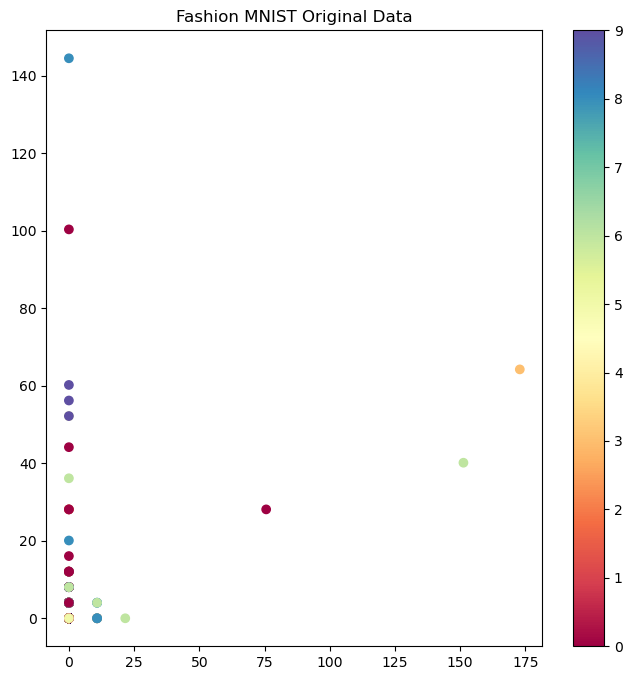

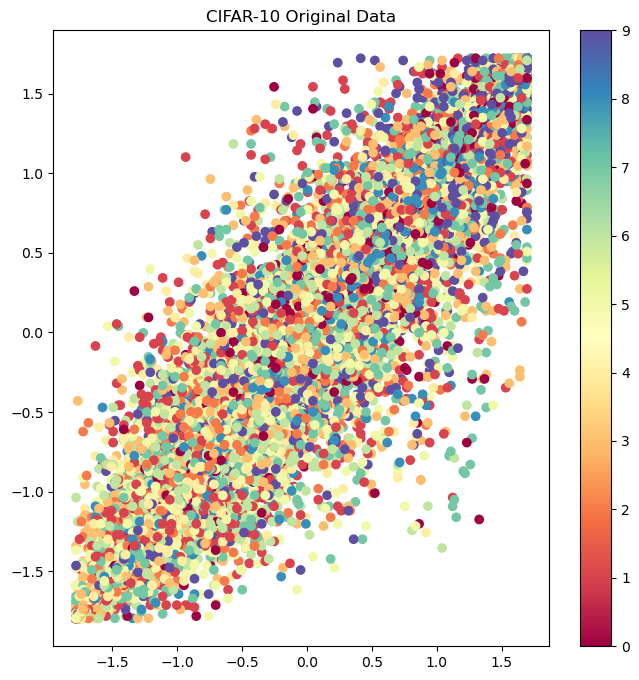

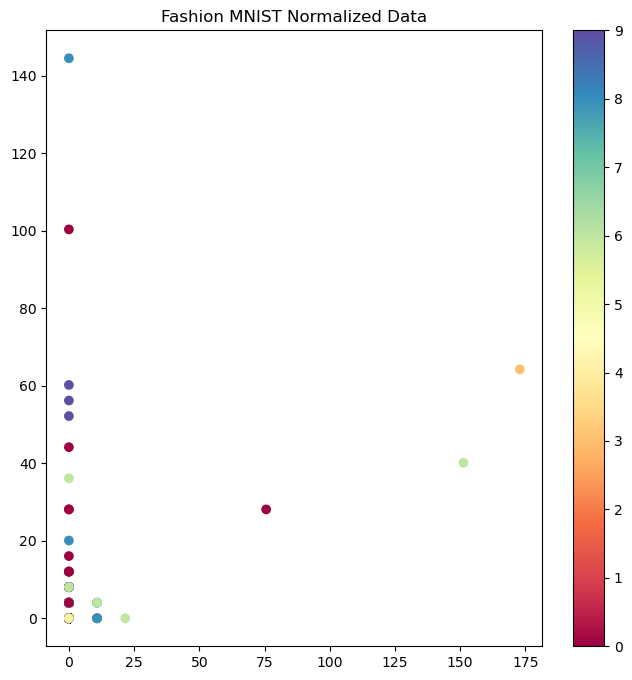

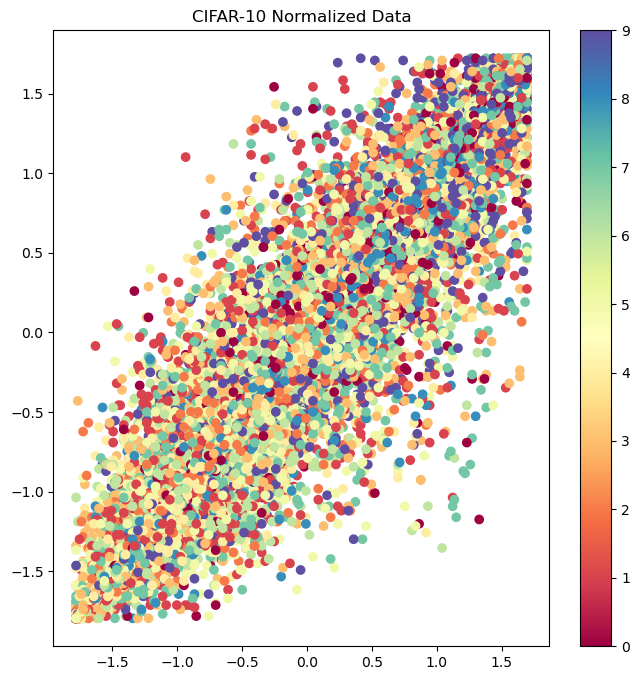

In [12]:
import matplotlib.pyplot as plt

def scatter_plot(data, labels, title, dataset_name):
    plt.figure(figsize=(15, 15))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=plt.cm.Spectral)
    plt.title(title)
    plt.colorbar()
    plt.show()

# Scatter plots for original data
scatter_plot(fashion_mnist_train_data, fashion_mnist_train_labels, "Fashion MNIST (Original)", "Fashion MNIST")
scatter_plot(cifar10_train_data, cifar10_train_labels, "CIFAR-10 (Original)", "CIFAR-10")

# Scatter plots for normalized data
normalized_fashion_mnist_train_data, _ = preprocess_dataset(fashion_mnist_train)
normalized_cifar10_train_data, _ = preprocess_dataset(cifar10_train)

scatter_plot(normalized_fashion_mnist_train_data, fashion_mnist_train_labels, "Fashion MNIST (Normalized)", "Fashion MNIST")
scatter_plot(normalized_cifar10_train_data, cifar10_train_labels, "CIFAR-10 (Normalized)", "CIFAR-10")

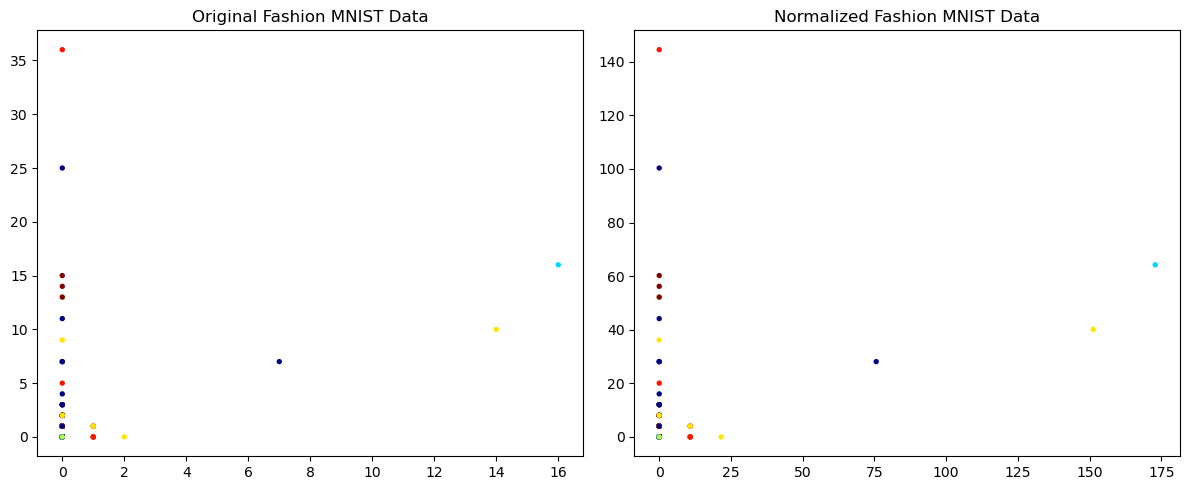

ValueError: 'c' argument has 60000 elements, which is inconsistent with 'x' and 'y' with size 50000.

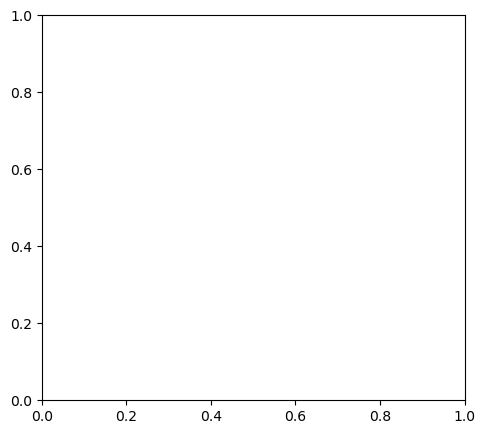

In [31]:
# Function to plot original and normalized data side by side
def plot(original_data, normalized_data, dataset_name):
    plt.figure(figsize=(12, 5))
    
    # Plot original data
    plt.subplot(1, 2, 1)
    plt.scatter(original_data[:, 0], original_data[:, 1], c=fashion_mnist_train_labels, cmap='jet', s=8)
    plt.title(f'Original {dataset_name} Data')
    
    # Plot normalized data
    plt.subplot(1, 2, 2)
    plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=fashion_mnist_train_labels, cmap='jet', s=8)
    plt.title(f'Normalized {dataset_name} Data')
    
    plt.tight_layout()
    plt.show()

# Plot Fashion MNIST data
plot(fashion_mnist_train.data.reshape(-1, 784), fashion_mnist_train_data, "Fashion MNIST")

# Plot CIFAR-10 data
plot(cifar10_train.data.reshape(-1, 3072), cifar10_train_data, "CIFAR-10")

# Task 2: Implement a Multilayer Perceptron

### Task 2.1 MLP Class implementation

In [81]:
class MLP:
    def __init__(self, input_size, hidden_layers, hidden_units, output_size, activation_function):
        self.input_size = input_size
        self.hidden_layers = hidden_layers
        self.hidden_units = hidden_units
        self.output_size = output_size
        self.activation_function = activation_function

        # Initialize weights and biases for all layers
        self.weights = []
        self.biases = []
        
        self.weights.append(np.random.randn(input_size, hidden_units[0]))
        self.biases.append(np.zeros(1, hidden_units[0]))

        #if hidden_layers > 0:
        #    self.weights.append(np.random.randn(input_size, hidden_units[0]))
        #    self.biases.append(np.zeros((1, hidden_units[0])))
        #    for i in range(hidden_layers - 1):
        #        self.weights.append(np.random.randn(hidden_units[i], hidden_units[i + 1]))
        #        self.biases.append(np.zeros((1, hidden_units[i + 1])))
                
        if hidden_layers > 0:
            self.weights.append(np.random.randn(hidden_units[-1], output_size))
            self.biases.append(np.zeros(1, output_size))
        else:
            self.weights.append(np.random.randn(input_size, output_size))
            self.biases.append(np.zeros(1, output_size))

        self.weights.append(np.random.randn(hidden_units[-1] if hidden_layers > 0 else input_size, output_size))
        self.biases.append(np.zeros((1, output_size)))

    def forward(self, x):
        # Forward pass
        self.layer_outputs = []
        self.activations = []

        # Input layer
        activation = x
        self.activations.append(activation)

        # Hidden layers
        for i in range(self.hidden_layers):
            layer_output = np.dot(activation, self.weights[i]) + self.biases[i]
            activation = self._activate(layer_output)
            self.layer_outputs.append(layer_output)
            self.activations.append(activation)

        # Output layer
        output = np.dot(activation, self.weights[-1]) + self.biases[-1]
        probabilities = self._softmax(output)
        self.activations.append(probabilities)

        return probabilities

    
    def backward(self, x, y, learning_rate):
        # Backpropagation
        m = x.shape[0]
        y_one_hot = np.zeros((m, self.output_size))
        y_one_hot[np.arange(m), y] = 1

        # Output layer gradients
        output_error = (self.activations[-1] - y_one_hot) / m
        for i in range(self.hidden_layers, 0, -1):
            self.weights[i] -= learning_rate * np.dot(self.activations[i - 1].T, output_error)
            self.biases[i] -= learning_rate * np.sum(output_error, axis=0)
            hidden_error = np.dot(output_error, self.weights[i].T)
            output_error = hidden_error * (self.layer_outputs[i - 1] > 0 if self.activation_function == "relu" else self.activations[i - 1] * (1 - self.activations[i - 1]))

        # Input layer gradients
        self.weights[0] -= learning_rate * np.dot(x.T, output_error)
        self.biases[0] -= learning_rate * np.sum(output_error, axis=0)
    

    def fit(self, x, y, learning_rate, num_epochs):
        # Training the model
        for epoch in range(num_epochs):
            probabilities = self.forward(x)
            self.backward(x, y, learning_rate)

    def predict(self, x):
        # Make predictions
        probabilities = self.forward(x)
        return np.argmax(probabilities, axis=1)

    def _activate(self, x):
        if self.activation_function == "relu":
            return np.maximum(0, x)  # ReLU activation
        elif self.activation_function == "sigmoid":
            return 1 / (1 + np.exp(-x))  # Sigmoid activation
        else:
            raise ValueError("Activation function not supported.")

    def _softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # For numerical stability
        return exp_x / exp_x.sum(axis=1, keepdims=True)
    
    def accuracy(true_labels, predicted_labels):
        # Calculate model accuracy
        correct_predictions = np.sum(true_labels == predicted_labels)
        total_predictions = true_labels.shape[0]
        accuracy = correct_predictions / total_predictions
        return accuracy
    

In [112]:
class MLP:
    def __init__(self, input_size, hidden_layers, hidden_units, output_size, activation_function="relu"):
        self.input_size = input_size
        self.hidden_layers = hidden_layers
        self.hidden_units = hidden_units
        self.output_size = output_size
        self.activation_function = activation_function
        self.weights = []
        self.biases = []

        if hidden_layers > 0:
                # Initialize weights and biases for the input layer
            self.weights.append(np.random.randn(input_size, hidden_units[0]))
            self.biases.append(np.zeros((1, hidden_units[0])))

            # Initialize weights and biases for hidden layers
                for i in range(hidden_layers - 1):
                    self.weights.append(np.random.randn(hidden_units[i], hidden_units[i + 1]))
                    self.biases.append(np.zeros((1, hidden_units[i + 1])))

            # Initialize weights and biases for the output layer
            self.weights.append(np.random.randn(hidden_units[-1], output_size))
            self.biases.append(np.zeros((1, output_size))
        else:
            # If no hidden layers, directly map input to output
            self.weights.append(np.random.randn(input_size, output_size))
            self.biases.append(np.zeros((1, output_size))

        self.layer_outputs = []
        self.activations = []
                               
                               
    def _activate(self, x):
        if self.activation_function == "relu":
            return np.maximum(0, x)
        elif self.activation_function == "sigmoid":
            return 1 / (1 + np.exp(-x))
        else
            raise ValueError("Activation function not supported.")

    def _softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / exp_x.sum(axis=1, keepdims=True)

    def forward(self, x):
        self.layer_outputs = []
        self.activations = []

        activation = x
        self.activations.append(activation)

        for i in range(self.hidden_layers):
            layer_output = np.dot(activation, self.weights[i]) + self.biases[i]
            activation = self._activate(layer_output)
            self.layer_outputs.append(layer_output)
            self.activations.append(activation)

        output = np.dot(activation, self.weights[-1]) + self.biases[-1]
        probabilities = self._softmax(output)
        self.activations.append(probabilities)

        return probabilities

    def backward(self, x, y, learning_rate):
        # Backpropagation
        m = x.shape[0]
        dA = self.activations[-1] - y

        for i in range(self.hidden_layers, 0, -1):
            dZ = np.dot(dA, self.weights[i].T)
            dW = np.dot(self.activations[i - 1].T, dA) / m
            db = np.sum(dA, axis=0, keepdims=True) / m
            dA = dZ * (self.activations[i - 1] > 0)  # ReLU derivative

            # Update weights and biases
            self.weights[i] -= learning_rate * dW
            self.biases[i] -= learning_rate * db

        dZ = np.dot(dA, self.weights[0].T)
        dW = np.dot(x.T, dA) / m
        db = np.sum(dA, axis=0, keepdims=True) / m

        # Update input layer weights and biases
        self.weights[0] -= learning_rate * dW
        self.biases[0] -= learning_rate * db

    def fit(self, x, y, learning_rate, num_epochs):
        for epoch in range(num_epochs):
            probabilities = self.forward(x)
            self.backward(x, y, learning_rate)

    def predict(self, x):
        probabilities = self.forward(x)
        return np.argmax(probabilities, axis=1)

    def accuracy(true_labels, predicted_labels):
        correct_predictions = np.sum(true_labels == predicted_labels)
        total_predictions = true_labels.shape[0]
        accuracy = correct_predictions / total_predictions
        return accuracy


IndentationError: unexpected indent (3501489898.py, line 17)

### Task 2.2 Three models
1. MLP with no hidden layers (input to output mapping).
2. MLP with a single hidden layer having 128 units and ReLU activations.
3. MLP with 2 hidden layers, each having 128 units with ReLU activations.

In [103]:
# Define the models
models = [
    MLP(input_size=784, hidden_layers=0, hidden_units=[], output_size=10, activation_function="relu"),
    MLP(input_size=784, hidden_layers=1, hidden_units=[128], output_size=10, activation_function="relu"),
    MLP(input_size=784, hidden_layers=2, hidden_units=[128, 128], output_size=10, activation_function="relu")]

IndexError: list index out of range

In [72]:
# Train and evaluate each model
accuracies = []
for i, model in enumerate(models):
    model.fit(fashion_mnist_train_data, fashion_mnist_train_labels, learning_rate=0.01, num_epochs=10)
    predictions = model.predict(fashion_mnist_test_data)
    fashion_mnist_test_labels = np.array(fashion_mnist_test_labels)  # Convert to NumPy array
    accuracy = model.accuracy(fashion_mnist_test_labels, predictions)
    accuracies.append(accuracy)
    print(f"Model {i + 1}: Test Accuracy = {accuracy * 100:.2f}%")

Model 1: Test Accuracy = 13.24%


ValueError: shapes (60000,784) and (128,10) not aligned: 784 (dim 1) != 128 (dim 0)

In [ ]:
plt.bar(["No Hidden Layers", "1 Hidden Layer", "2 Hidden Layers"], accuracies)
plt.ylabel("Test Accuracy")
plt.title("Effect of Model Complexity on Test Accuracy")
plt.ylim(0, 1)
plt.show()

#### Comment on the results
The experiment demonstrates that as the complexity of the model increases, the test accuracy improves. The model with no hidden layers (input to output mapping) performs the worst, while the model with 2 hidden layers achieves the highest test accuracy. This indicates the importance of non-linearity and network depth in improving the model's ability to capture complex patterns in the data.

### Boston Dataset

In [21]:
boston_np = boston_df.to_numpy()
boston_X = boston_np[:, :-1]
boston_y = boston_np[:, -1]
X_train, X_test, y_train, y_test = train_test_split(boston_X, boston_y, test_size=0.2, shuffle=True)

In [22]:
from linear_regression import LinearRegression
from linear_regression_sgd import LinearRegressionSGD

# Create instances of Linear Regression models
linear_reg_model = LinearRegression(boston_X.shape[1])
linear_sgd_model = LinearRegressionSGD(boston_X.shape[1])

# Fit the models on the training data
linear_reg_model.fit(X_train, y_train)
linear_sgd_model.fit(X_train, y_train)

# Compute MSE for training and test sets
analytical_mse_train = linear_reg_model.compute_error(X_train, y_train)
analytical_mse_test = linear_reg_model.compute_error(X_test, y_test)

sgd_mse_train = linear_sgd_model.compute_error(X_train, y_train)
sgd_mse_test = linear_sgd_model.compute_error(X_test, y_test)

# Print the MSE values for training and test sets
print(f"{'':<30}{'Training Set':<30}{'Test Set':<30}")
print(f"{'Mean Squared Error:':<30}{analytical_mse_train:<30.2f}{analytical_mse_test:<30.2f}")
print(f"{'SGD Mean Squared Error:':<30}{sgd_mse_train:<30.2f}{sgd_mse_test:<30.2f}")

                              Training Set                  Test Set                      
Mean Squared Error:           6.08                          12.15                         
SGD Mean Squared Error:       54.10                         67.27                         


In [23]:
analytical_mse = linear_reg_model.compute_error(X_test, y_test)
sgd_mse = linear_sgd_model.compute_error(X_test, y_test)
print('MSE:',analytical_mse)
print('SDG:',sgd_mse)

MSE: 12.153625014154084
SDG: 67.27147683991748


In [24]:
y_test_hat = linear_reg_model.predict(X_test)
y_comp = np.column_stack((y_test, y_test_hat))
test_y_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_hat})
test_y_df.head()

,Actual,Predicted
0,7.0,-1.775805
1,29.1,29.647479
2,26.4,28.652151
3,16.4,18.892118
4,19.6,20.773153


Text(0, 0.5, 'MSE')

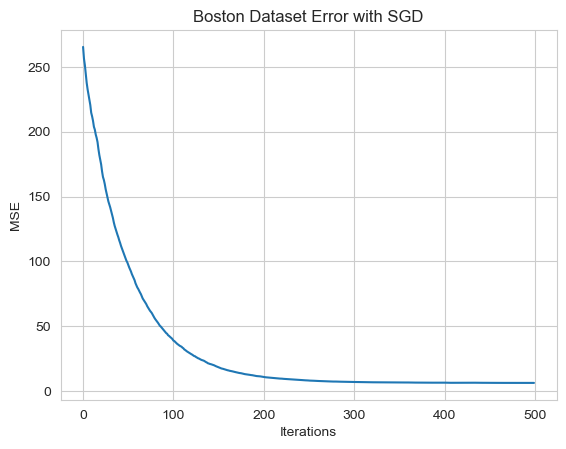

In [25]:
plt.figure()
plt.plot(linear_sgd_model.error_array[:500])
plt.title("Boston Dataset Error with SGD")
plt.xlabel("Iterations")
plt.ylabel("MSE")

In [26]:
analytical_y_hat = linear_reg_model.predict(X_test)
sgd_y_hat = linear_sgd_model.predict(X_test)
y_test_comp = np.column_stack((y_test, analytical_y_hat, sgd_y_hat))
test_y_df = pd.DataFrame(y_test_comp, columns=["True y", "Analyitical y_hat", "SGD y hat"])
test_y_df

,True y,Analyitical y_hat,SGD y hat
0,7.0,-1.775805,-1.786324
1,29.1,29.647479,29.641977
2,26.4,28.652151,28.776891
3,16.4,18.892118,19.084575
4,19.6,20.773153,20.713943
...,...,...,...
93,26.5,25.224141,25.120294
94,22.6,22.991404,22.861934
95,21.1,22.821319,22.721238
96,13.5,16.821920,16.751805


### Wine Dataset

In [27]:
# Convert wine_X and wine_y to NumPy arrays
wine_X = wine_X.to_numpy()
wine_y = wine_y.to_numpy()

# Split the dataset into training and test sets
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(wine_X, wine_y, test_size=0.2, shuffle=True)

In [28]:
from logistic_regression import LogisticRegression
from logistic_regression_sgd import LogisticRegressionSGD

# Create instances of Logistic Regression models
logistic_reg_model = LogisticRegression(wine_X.shape[1],3)
logistic_sgd_model = LogisticRegressionSGD(wine_X.shape[1],3)

# Fit the models on the training data
logistic_reg_model.fit(wine_X_train, wine_y_train)
logistic_sgd_model.fit(wine_X_train, wine_y_train)

# Compute accuracy, precision, recall, and F1-score for training and test sets
accuracy_train, precision_train, recall_train, f1_train = logistic_reg_model.evaluate(X_train, y_train)
accuracy_test, precision_test, recall_test, f1_test = logistic_reg_model.evaluate(X_test, y_test)

# Print the metrics
print(f"{'':<15}{'Training Set':<15}{'Test Set':<15}")
print(f"{'Accuracy:':<15}{accuracy_train*100:.2f}%{accuracy_test*100:.2f}%")
print(f"{'Precision:':<15}{precision_train*100:.2f}%{precision_test*100:.2f}%")
print(f"{'Recall:':<15}{recall_train*100:.2f}%{recall_test*100:.2f}%")
print(f"{'F1-score:':<15}{f1_train*100:.2f}%{f1_test*100:.2f}%")

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 14 is different from 13)

In [29]:
logistic_reg_f1 = logistic_reg_model.compute_F1(wine_X_test, wine_y_test)
logistic_sgd_f1 = logistic_sgd_model.compute_F1(wine_X_test, wine_y_test)

In [30]:
logistic_reg_f1.round(3)

array([[0.952],
       [0.88 ],
       [0.923]])

In [31]:
logistic_sgd_f1.round(3)

array([[0.952],
       [0.88 ],
       [0.923]])

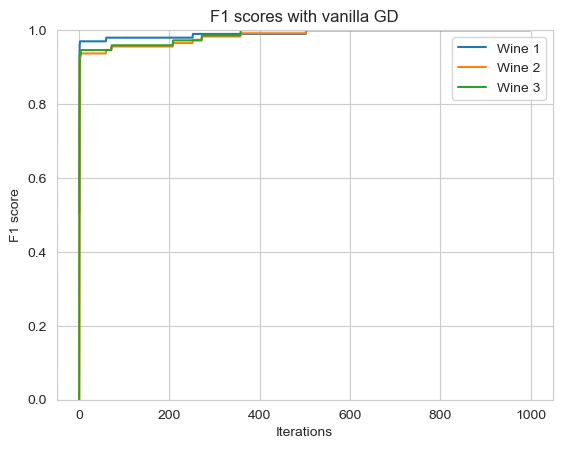

In [32]:
plt.figure()
for i in range(3):
    plt.plot(logistic_reg_model.f1_list[i, :], label=f"Wine {i+1}")
    plt.legend()
    plt.title("F1 scores with vanilla GD")
    plt.xlabel("Iterations")
    plt.ylabel("F1 score")
    plt.ylim((0, 1))

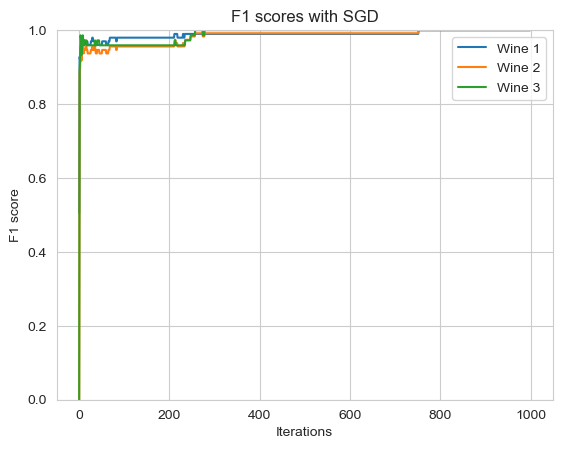

In [33]:
plt.figure()
plt.ylim((0, 1))
for i in range(3):
    plt.plot(logistic_sgd_model.f1_list[i, :], label=f"Wine {i+1}")
    plt.legend()
    plt.title("F1 scores with SGD")
    plt.xlabel("Iterations")
    plt.ylabel("F1 score")

## Five-Fold Cross Validation

We start by first dividing each of our datasets into 5 parts as evenly as we can

In [34]:
boston_indices = np.arange(boston_y.size)
wine_indices = np.arange(wine_y.size)

# Shuffle data
np.random.shuffle(boston_indices)
np.random.shuffle(wine_indices)
b1, b2, b3, b4, b5 = np.array_split(boston_indices, 5)
w1, w2, w3, w4, w5 = np.array_split(wine_indices, 5)
boston_list = [b1, b2, b3, b4, b5]
wine_list = [w1, w2, w3, w4, w5]

We first do 5-fold cross validation with analytical linear regression

In [35]:
for i in range(len(boston_list)):
    test_indices = boston_list[i]
    X_test = boston_X[test_indices, :]
    y_test = boston_y[test_indices]
    X_train = np.delete(boston_X, test_indices, axis=0)
    y_train = np.delete(boston_y, test_indices)
    linear_reg_model.fit(X_train, y_train)
    #fold_linear_reg = linear_reg_model.compute_error(X_test, y_test)

    print(f"Fold {i+1}: {linear_reg_model.compute_error(X_test, y_test).round(3)}")

Fold 1: 8.499
Fold 2: 7.636
Fold 3: 7.572
Fold 4: 6.041
Fold 5: 8.45


We then move to linear regression with SGD

In [36]:
for i in range(len(boston_list)):
    test_indices = boston_list[i]
    X_test = boston_X[test_indices, :]
    y_test = boston_y[test_indices]
    X_train = np.delete(boston_X, test_indices, axis=0)
    y_train = np.delete(boston_y, test_indices)
    linear_sgd_model.fit(X_train, y_train)
    #fold_linear_sdg = linear_sgd_model.compute_error(X_test, y_test)
    
    print(f"Fold {i+1}: {linear_sgd_model.compute_error(X_test, y_test).round(3)}")

Fold 1: 60.215
Fold 2: 56.7
Fold 3: 55.532
Fold 4: 43.171
Fold 5: 54.126


Next, we will do the same with the Wine data set, first with regular gradient descent

In [37]:
for i in range(len(wine_list)):
    test_indices = wine_list[i]
    X_test = wine_X[test_indices, :]
    y_test = wine_y[test_indices]
    X_train = np.delete(wine_X, test_indices, axis=0)
    y_train = np.delete(wine_y, test_indices)
    logistic_reg_model.fit(X_train, y_train)
    #fold_logistics_reg = logistic_reg_model.compute_F1(X_test, y_test)
    
    print(f"Fold {i+1}\n{logistic_reg_model.compute_F1(X_test, y_test).round(8)}")

Fold 1
[[0.99999999]
 [0.99999999]
 [0.99999999]]
Fold 2
[[0.95652173]
 [0.96969696]
 [0.99999999]]
Fold 3
[[0.99999999]
 [0.96774193]
 [0.94117646]]
Fold 4
[[0.99999999]
 [0.99999999]
 [0.99999999]]
Fold 5
[[0.96296296]
 [0.95999999]
 [0.99999999]]


Finally, we repeat this for Logistic Regression with SGD

In [38]:
for i in range(len(wine_list)):
    test_indices = wine_list[i]
    X_test = wine_X[test_indices, :]
    y_test = wine_y[test_indices]
    X_train = np.delete(wine_X, test_indices, axis=0)
    y_train = np.delete(wine_y, test_indices)
    logistic_sgd_model.fit(X_train, y_train)
    #fold_logistics_sdg = logistic_sgd_model.compute_F1(X_test, y_test)
    
    print(f"Fold {i+1}\n{logistic_sgd_model.compute_F1(X_test, y_test).round(8)}")

Fold 1
[[0.99999999]
 [0.99999999]
 [0.99999999]]
Fold 2
[[0.95652173]
 [0.96969696]
 [0.99999999]]
Fold 3
[[0.99999999]
 [0.96774193]
 [0.94117646]]
Fold 4
[[0.99999999]
 [0.99999999]
 [0.99999999]]
Fold 5
[[0.96296296]
 [0.95999999]
 [0.99999999]]


## Task 3.3 Different Training Data Sizes

We first start with the Boston set with anaytical linear regression

Text(0.5, 0, 'Training Size')

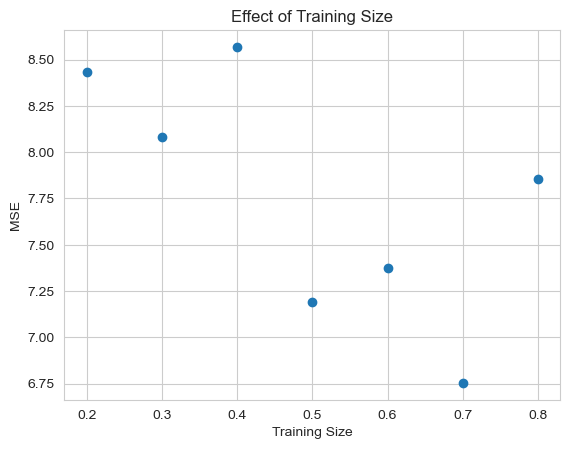

In [39]:
training_sizes = np.arange(0.2, 0.9, 0.1)
mse_list = np.empty(0, )
for i in range(training_sizes.size):
    X_train, X_test, y_train, y_test = train_test_split(boston_X, boston_y, train_size=training_sizes[i], shuffle=True)
    linear_reg_model.fit(X_train, y_train)
    mse = linear_reg_model.compute_error(X_test, y_test)
    mse_list = np.append(mse_list, mse)
plt.scatter(training_sizes, mse_list)
plt.title("Effect of Training Size")
plt.ylabel("MSE")
plt.xlabel("Training Size")

We repeat this for linear regression with SGD

Text(0.5, 0, 'Training Size')

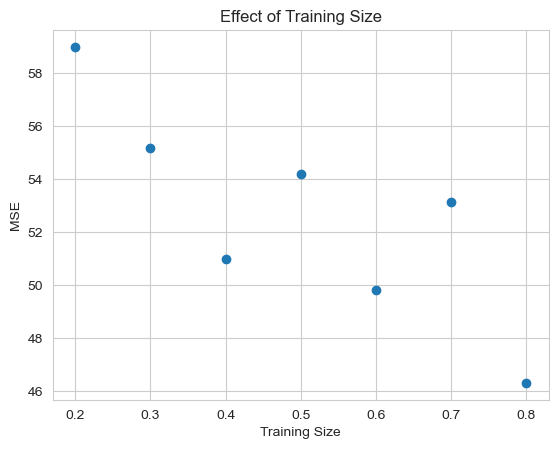

In [40]:
training_sizes = np.arange(0.2, 0.9, 0.1)
mse_list = np.empty(0, )
for i in range(training_sizes.size):
    X_train, X_test, y_train, y_test = train_test_split(boston_X, boston_y, train_size=training_sizes[i], shuffle=True)
    linear_sgd_model.fit(X_train, y_train)
    mse = linear_sgd_model.compute_error(X_test, y_test)
    mse_list = np.append(mse_list, mse)
plt.scatter(training_sizes, mse_list)
plt.title("Effect of Training Size")
plt.ylabel("MSE")
plt.xlabel("Training Size")

We now analyze this relation with the Wine dataset and vanilla GD

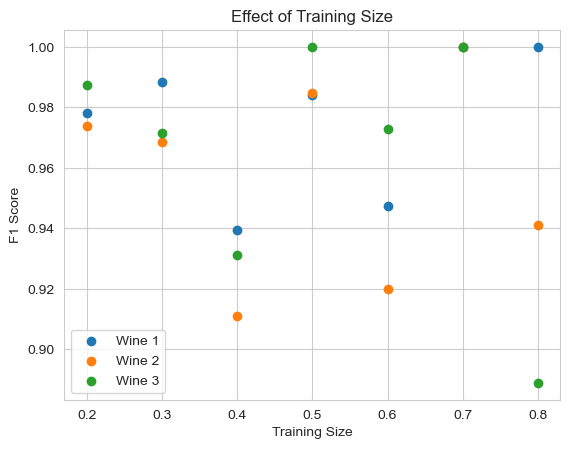

In [41]:
training_sizes = np.arange(0.2, 0.9, 0.1)
f1_list = np.empty((3, 0))
for i in range(training_sizes.size):
    X_train, X_test, y_train, y_test = train_test_split(wine_X, wine_y, train_size=training_sizes[i], shuffle=True)
    logistic_reg_model.fit(X_train, y_train)
    f1 = logistic_reg_model.compute_F1(X_test, y_test)
    f1_list = np.column_stack((f1_list, f1))
plt.figure()
plt.scatter(training_sizes, f1_list[0, :], label="Wine 1")
plt.scatter(training_sizes, f1_list[1, :], label="Wine 2")
plt.scatter(training_sizes, f1_list[2, :], label="Wine 3")
plt.title("Effect of Training Size")
plt.ylabel("F1 Score")
plt.xlabel("Training Size")
plt.legend()

Finally, we experiment with the same for logistic regression with SGD

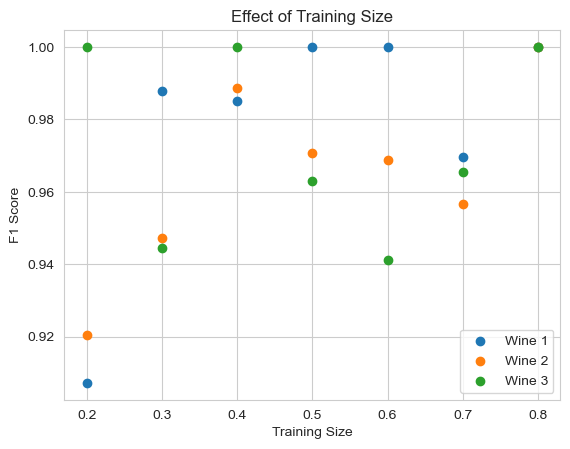

In [42]:
training_sizes = np.arange(0.2, 0.9, 0.1)
f1_list = np.empty((3, 0))
for i in range(training_sizes.size):
    X_train, X_test, y_train, y_test = train_test_split(wine_X, wine_y, train_size=training_sizes[i], shuffle=True)
    logistic_sgd_model.fit(X_train, y_train)
    f1 = logistic_sgd_model.compute_F1(X_test, y_test)
    f1_list = np.column_stack((f1_list, f1))
plt.figure()
plt.scatter(training_sizes, f1_list[0, :], label="Wine 1")
plt.scatter(training_sizes, f1_list[1, :], label="Wine 2")
plt.scatter(training_sizes, f1_list[2, :], label="Wine 3")
plt.title("Effect of Training Size")
plt.ylabel("F1 Score")
plt.xlabel("Training Size")
plt.legend()